# 생선 분류

- 수산물 전문 물류 센터에서 신입 직원들이 생선 이름을 외우지 못해 작업의 효율성이 현저히 떨어지는 일이 잦다
- 이 물류 센터에서는 주로 생선의 길이와 무게로 생선을 분류한다
- 판매하는 생선은 도미, 잉어, 대구, 청돔, 농어, 민물꼬치고기, 빙어이다

# 이진 분류(binary classification)

- 분류(classification) : 여러 개의 범주(클래스) 중에 하나를 구별해 내는 것
- 이진 분류 : 2개의 범주 중 하나를 고르는 분류
    - 도미인가 빙어인가

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

##  데이터 준비

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
# 이번 예제에서는 도미와 빙어에 대한 데이터 중 Species, Weight, Length2 피처만 사용
df = df[df["Species"].isin(["Bream", "Smelt"])][["Species", "Weight", "Length2"]]

In [7]:
df.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [8]:
df.tail()

,Species,Weight,Length2
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3
158,Smelt,19.9,15.0


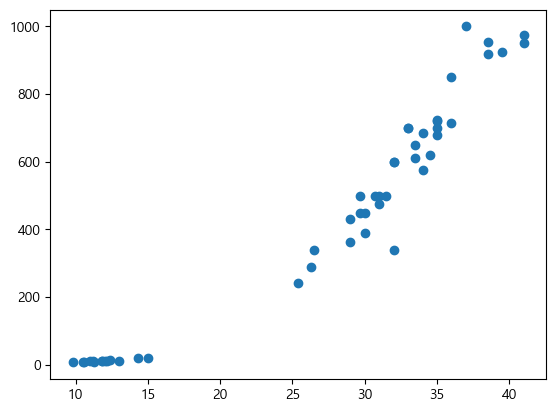

In [9]:
plt.figure()
plt.scatter(data = df, x = "Length2", y = "Weight")
plt.show()

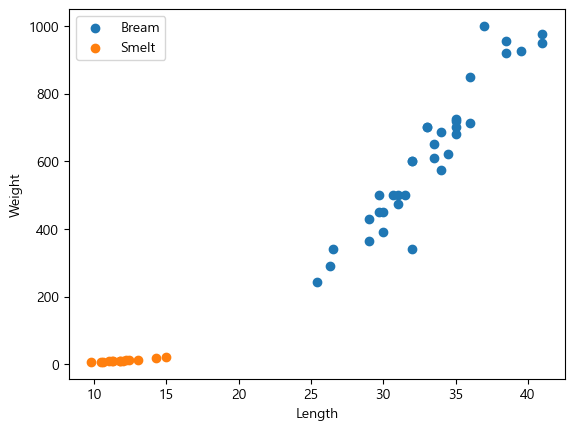

In [10]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"],
                group["Weight"],
                label = name)
    
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

- 도미의 길이가 길수록 무게가 무거워지는 경향이 있음
- 빙어는 상대적으로 무게가 영향을 덜 받는 것처럼 보이지만 데이터의 분포가 일직선에 가까워 선형적임

## 데이터 전처리

### 레이블 인코딩

- 컴퓨터는 문자의 의미를 직접 이해하지 못함
- 따라서 도미와 빙어를 숫자 0과 1로 표현

In [11]:
le = LabelEncoder()

In [12]:
df["label"] = le.fit_transform(df["Species"])

In [13]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [14]:
df.tail()

,Species,Weight,Length2,label
154,Smelt,12.2,12.2,1
155,Smelt,13.4,12.4,1
156,Smelt,12.2,13.0,1
157,Smelt,19.7,14.3,1
158,Smelt,19.9,15.0,1


In [15]:
df["label"].value_counts()

0    35
1    14
Name: label, dtype: int64

In [16]:
# 인코딩 클래스 확인
le.classes_

array(['Bream', 'Smelt'], dtype=object)

In [17]:
# 인코딩된 값을 다시 디코딩
le.inverse_transform(df["label"][:5])

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 모델 훈련

- K-Nearest Neighbor
    - 기존 데이터 중 가장 유사한 k개의 데이터를 이용해서 새로운 데이터를 예측
    - 특징
        - 최고 인접 다수결
            - 기존 데이터 중 가장 유사한 k개의 데이터를 측정하여 분류
        - Lazy learning 기법
            - 새로운 입력 값이 들어온 후 분류 시작
            - 데이터셋을 저장만 하고 일반화된 모델을 능동적으로 만들지 않음
        - 단순 유연성
            - 모형이 단순하며 파라미터의 가정이 거의 없음
    
    - 장점
        - 학습이 간단
        - 훈련 데이터의 크기가 클수록 정확해짐
        - 모형이 단순하고 쉽게 구현할 수 있음
        
    - 단점
        - k값 선정에 따라 성능이 좌우됨
        - 높은 자원요구량
            - 데이터셋 전체를 메모리에 기억
        - 계산 복잡성
            - 모든 데이터와의 거리측정 수행이 필요

<img src = "./image/KNN.png">

In [19]:
np.sqrt(df.shape[0])

7.0

In [20]:
kn = KNeighborsClassifier(n_neighbors = 5)

In [22]:
kn.fit(df[["Length2", "Weight"]], df[["label"]])

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

## 모델 평가

In [23]:
kn.score(df[["Length2", "Weight"]], df[["label"]])

1.0

- 정확도
    - 정확한 답을 몇 개 맞혔는지를 백분율로 나타낸 값
    - 0 ~ 1 사이의 값으로 출력
    - 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

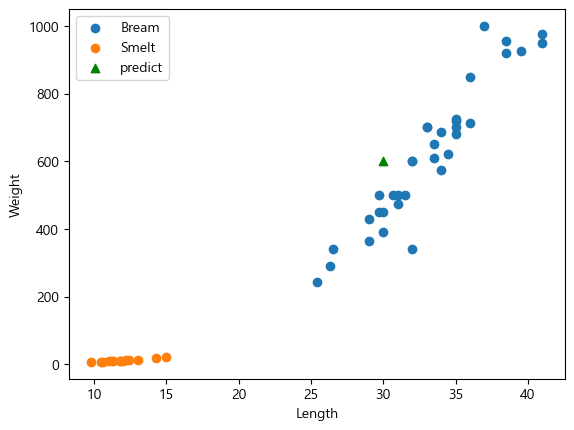

In [24]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"],
                group["Weight"],
                label = name)
    
plt.scatter(30, 600, c="g", marker = "^", label = "predict")
    
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [25]:
kn.predict([[30, 600]])

C:\Users\polar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
le.inverse_transform([0])

array(['Bream'], dtype=object)

- 모든 데이터로 학습을 하면 정답을 잘 맞히는 것이 당연하기 때문에 일반화 할 수 있는 좋은 모델인지를 평가할 평가지표가 없음